# Initial EDA and Feauture Engineering

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import pickle

In [5]:
with open('cl_matches.p', 'rb') as f:
    data = pickle.load(f)

## Initial Feature Engineering
- Create feature for value difference between home team and away team
- Create feature for score difference between home team and away team
- Create features for "richer team" vs. "poorer team"

In [53]:
df = pd.DataFrame(data)

In [54]:
df.head(3)

,home_team,away_team,score,match_season,home_value,away_value
0,AC Milan,Liverpool,5:6 on pens,2004,273.70,200.12
1,Liverpool,Chelsea,1:0,2004,200.12,331.47
2,PSV Eindhoven,AC Milan,3:1,2004,86.85,273.70


In [55]:
# Function to clean and convert score string to ints
def score_cleaner(x):
    if re.search(r'on pens', x):
        diff = 0
    elif re.search(r'AET', x):
        x = x[:-4].split(':')
        diff = int(x[0]) - int(x[1])
    else:
        x = x.split(':')
        diff = int(x[0]) - int(x[1])
    
    return diff

In [57]:
df['score_diff'] = df['score'].map(score_cleaner)
df['value_diff'] = df['home_value'] - df['away_value']

In [61]:
# Convert scores from home team - away team to "rich team" - "score team"
df['rp_score_diff'] = np.select(
    [df['home_value'] >= df['away_value'], df['home_value'] < df['away_value']],
    [df['score_diff'], -df['score_diff']]
)

# Convert value_diff to absolute ("rich team" value - "poor team" value)
df['rp_value_diff'] = np.abs(df['value_diff'])

In [70]:
df.head()

,home_team,away_team,score,match_season,home_value,away_value,score_diff,value_diff,rp_score_diff,rp_value_diff
0,AC Milan,Liverpool,5:6 on pens,2004,273.70,200.12,0,73.58,0,73.58
1,Liverpool,Chelsea,1:0,2004,200.12,331.47,1,-131.35,-1,131.35
2,PSV Eindhoven,AC Milan,3:1,2004,86.85,273.70,2,-186.85,-2,186.85
3,AC Milan,PSV Eindhoven,2:0,2004,273.70,86.85,2,186.85,2,186.85
4,Chelsea,Liverpool,0:0,2004,331.47,200.12,0,131.35,0,131.35


## Initial EDA and Data Viz

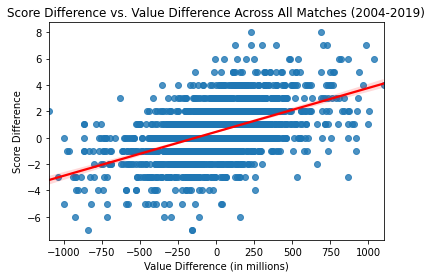

In [67]:
sns.regplot(x='value_diff', y='score_diff', data=df, line_kws={'color': 'red'})
plt.xlabel('Value Difference (in millions)')
plt.ylabel('Score Difference')
plt.title('Score Difference vs. Value Difference Across All Matches (2004-2019)')
plt.show()

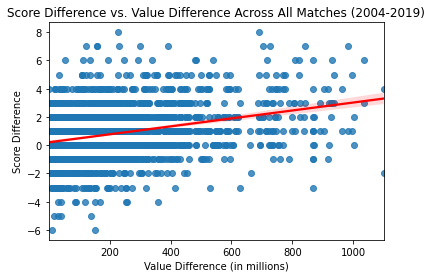

In [68]:
sns.regplot(x='rp_value_diff', y='rp_score_diff', data=df, line_kws={'color': 'red'})
plt.xlabel('Value Difference (in millions)')
plt.ylabel('Score Difference')
plt.title('Score Difference vs. Value Difference Across All Matches (2004-2019)')
plt.show()

In [69]:
df.corr()

,match_season,home_value,away_value,score_diff,value_diff,rp_score_diff,rp_value_diff
match_season,1.000000,0.466448,0.468859,-0.021880,-0.002548,0.048571,0.460245
home_value,0.466448,1.000000,0.244600,0.312904,0.613793,0.128063,0.387675
away_value,0.468859,0.244600,1.000000,-0.305095,-0.615353,-0.088245,0.387561
score_diff,-0.021880,0.312904,-0.305095,1.000000,0.502782,0.133215,-0.003593
value_diff,-0.002548,0.613793,-0.615353,0.502782,1.000000,0.175957,-0.000393
rp_score_diff,0.048571,0.128063,-0.088245,0.133215,0.175957,1.000000,0.299436
rp_value_diff,0.460245,0.387675,0.387561,-0.003593,-0.000393,0.299436,1.000000


In [71]:
df.describe()

,match_season,home_value,away_value,score_diff,value_diff,rp_score_diff,rp_value_diff
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,2011.477432,288.763420,289.003440,0.442327,-0.240020,0.850552,228.783872
std,4.599433,246.604186,246.984498,2.009744,303.346515,1.873772,199.125194
min,2004.000000,9.050000,9.050000,-7.000000,-1098.980000,-6.000000,0.200000
25%,2007.000000,102.570000,102.570000,-1.000000,-176.082500,0.000000,90.810000
50%,2011.000000,217.125000,216.350000,0.000000,0.000000,1.000000,176.030000
75%,2015.000000,396.500000,396.500000,2.000000,175.447500,2.000000,304.182500
max,2019.000000,1203.450000,1203.450000,8.000000,1098.980000,8.000000,1098.980000
